In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data=pd.read_csv('Sales_data_zone_wise.csv')

In [5]:
data

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062
5,Month - 6,1534390,1573128,1751825,2292044
6,Month - 7,1820196,1992031,1786826,1688055
7,Month - 8,1625696,1665534,2161754,2363315
8,Month - 9,1652644,1873402,1755290,1422059
9,Month - 10,1852450,1913059,1754314,1608387


# The mean sales generated by each zone.

In [7]:
mean=data.mean()
mean.round()

C:\Users\USER\AppData\Local\Temp/ipykernel_29096/3204574306.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean=data.mean()


Zone - A    1540493.0
Zone - B    1755560.0
Zone - C    1772871.0
Zone - D    1842927.0
dtype: float64

# Total sales generated by all the zones for each month.


In [20]:
data['Total_sale']=data['Zone - A']+data['Zone - B']+data['Zone - C']+data['Zone - D']
data[['Month','Total_sale']]

,Month,Total_sale
0,Month - 1,7022544
1,Month - 2,7152303
2,Month - 3,6475939
3,Month - 4,8174449
4,Month - 5,5995328
5,Month - 6,7151387
6,Month - 7,7287108
7,Month - 8,7816299
8,Month - 9,6703395
9,Month - 10,7128210


# Check whether all the zones generate the same amount of sales

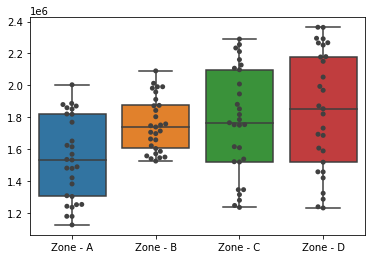

In [42]:
ax = sns.boxplot(data=data[['Zone - A','Zone - B','Zone - C','Zone - D']])
ax = sns.swarmplot(data=data[['Zone - A','Zone - B','Zone - C','Zone - D']], color=".25")

In [17]:
# A one-way ANOVA uses the following null and alternative hypotheses:

# H0 (null hypothesis): μ1 = μ2 = μ3 = μ4 (all the zone means are equal)
# H1 (alternate hypothesis): at least one mean  is different from the rest

In [35]:
import scipy.stats
scipy.stats.f_oneway(data['Zone - A'],data['Zone - B'],data['Zone - C'],data['Zone - D'])

F_onewayResult(statistic=5.672056106843581, pvalue=0.0011827601694503335)

In [37]:
f_statistics,pvalue=scipy.stats.f_oneway(data['Zone - A'],data['Zone - B'],data['Zone - C'],data['Zone - D'])
f_statistics

5.672056106843581

In [38]:
import scipy.stats

#find F critical value
scipy.stats.f.ppf(q=1-.05, dfn=3, dfd=25)

2.991240909549952

In [32]:
print("p-value for 5% significance is: ", pvalue)
if pvalue<0.05:
    print("Since pvalue is less than 0.05,we reject null hypothesis and conclude that the zones  have different mean  sales.")
else:
    print("Since pvalue  is greater than 0.05, we fail to reject null hypothesis and conclude that zones  have equal mean sales")

p-value for 5% significance is:  0.0011827601694503335
Since pvalue is less than 0.05,we reject null hypothesis and conclude that the zones  have different mean sales.


In [ ]:
# Since Calculated F value is greater than F critical at alpha=0.05 we reject the null hypothesis and conclude that  zones have different sale